In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_pd = pd.read_parquet('train.parquet' , engine='auto')

In [3]:
import seaborn as sns

def data_missing_values(dataframe: pd.DataFrame):
    """
    Визуализация пропусков в данных
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
    """
    missing_mask = dataframe.isna()
    missing_mask['values'] = dataframe['values'].apply(lambda row: True if (row.astype(str) == 'nan').all() else False)
    print('Необработанные данные', missing_mask.value_counts(), sep='\n')
    return missing_mask['values'][missing_mask['values']].index

gaps = data_missing_values(train_pd)

train_pd = train_pd.drop(list(gaps))
train_pd = train_pd.reset_index(drop = True)

Необработанные данные
id     dates  values  label
False  False  False   False    79912
              True    False       88
Name: count, dtype: int64


# Добавим признак = количество данных временного ряда.

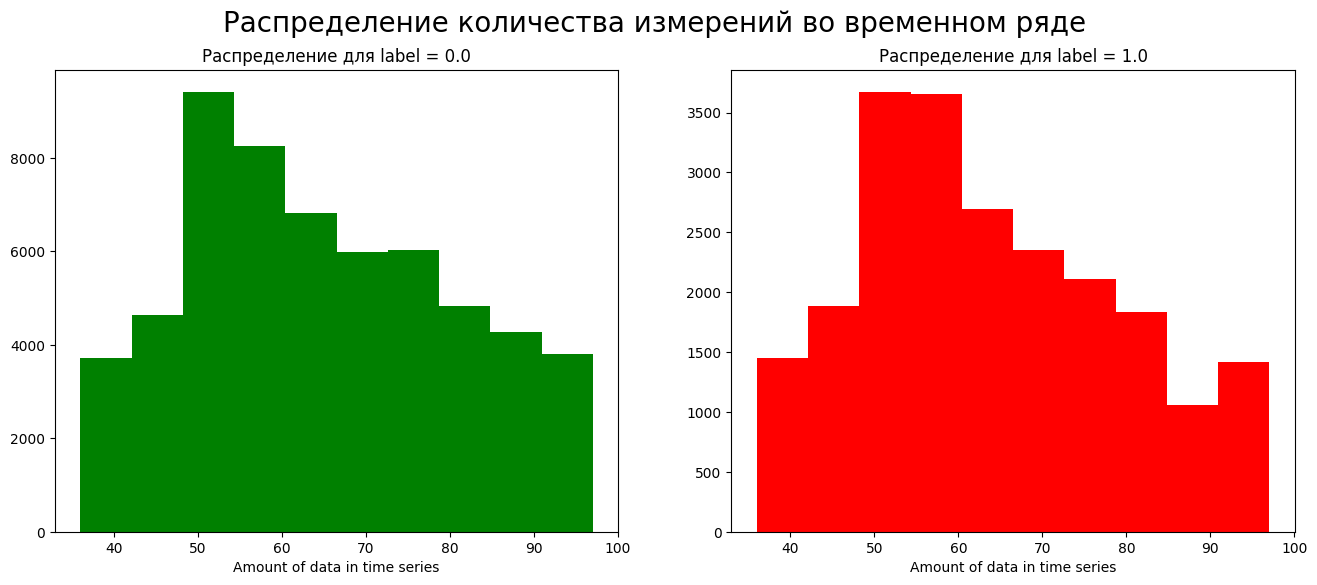

In [4]:
def time_series_data_count(dataframe: pd.DataFrame, title: str):
    """
    Гистограмма распределения количества данных во временных рядах,
    Добавим в датафрейм вычисленное количество данных временного ряда.
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
    """
    fig = plt.figure(figsize=(16, 6))
    axs = fig.subplots(1, 2)
    labels = dataframe['label'].value_counts().keys()
    dataframe['len_time_series'] = dataframe['values'].apply(lambda row: len(row))
    colors = ['green', 'red']
    for ax, label, color in zip(axs, labels, colors):
        ax.hist([len(value) for value in dataframe['values'][dataframe['label'] == label]], color=color)
        ax.set_title(f'Распределение для label = {label}')
        ax.set_xlabel('Amount of data in time series')
    fig.suptitle(title, fontsize = 20)
    plt.show()

time_series_data_count(train_pd, 'Распределение количества измерений во временном ряде')

In [5]:
train_pd

,id,dates,values,label,len_time_series
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,62
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,45
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,48
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,48
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,56
...,...,...,...,...,...
79907,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,55
79908,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,53
79909,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,51
79910,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,63


# Проанализируем первые 5 временных рядов каждой группы


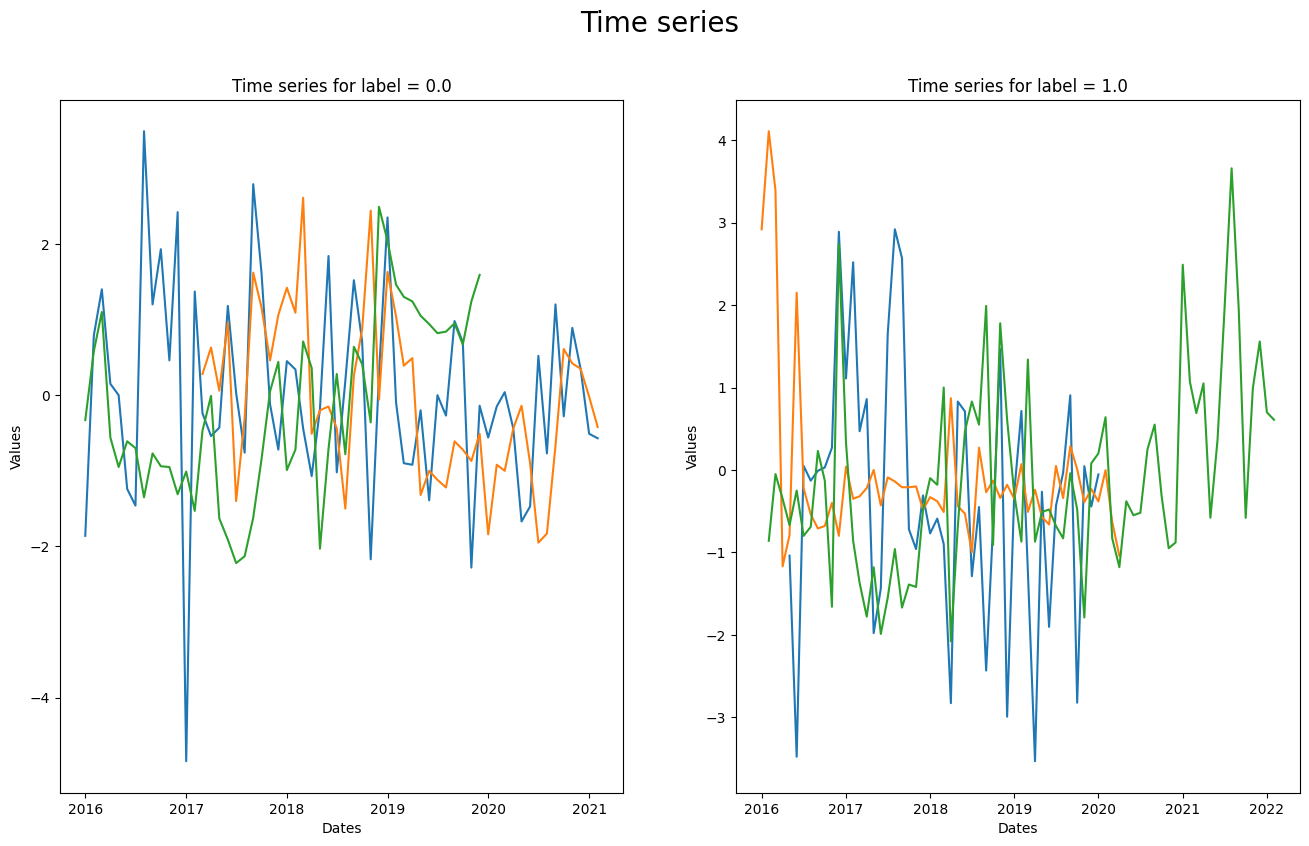

In [6]:
def plot_head_time_series(dataframe: pd.DataFrame, title: str, head: int):
    """
    Рисует первые head временных рядов каждой группы
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
        head (int): кол-во графиков
    """
    fig = plt.figure(figsize=(16, 9))
    axs = fig.subplots(1, 2)
    labels = dataframe['label'].value_counts().keys()
    for ax, label in zip(axs, labels):
        for num in range(head):
            ax.plot(np.array(dataframe['dates'][dataframe['label'] == label])[num], np.array(dataframe['values'][dataframe['label'] == label])[num])
        ax.set_xlabel('Dates')
        ax.set_ylabel('Values')
        ax.set_title(f'Time series for label = {label}')
    fig.suptitle(title, fontsize = 20)
    plt.show()

plot_head_time_series(train_pd, 'Time series', 3)

# На полученных данных можно заметить, что размах временного ряда отличаются.


# Проведем KPSS  тест на проверку стационарности ряда

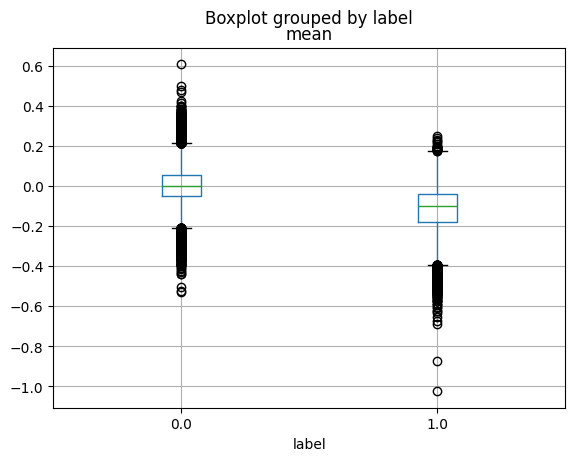

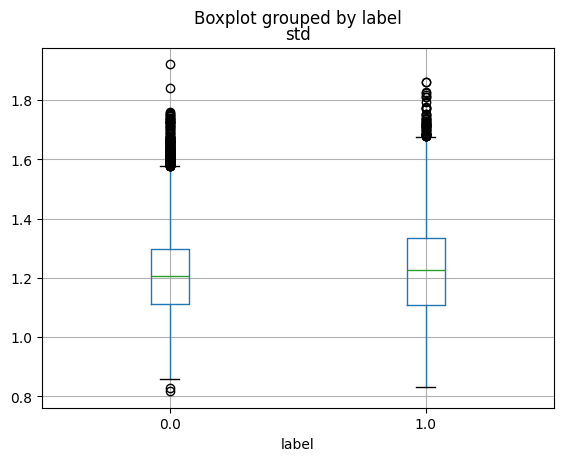

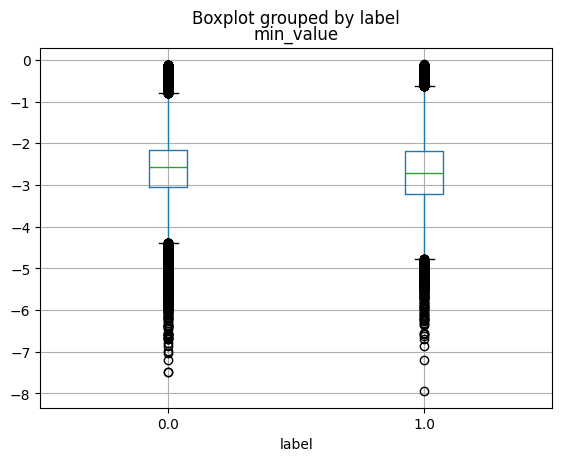

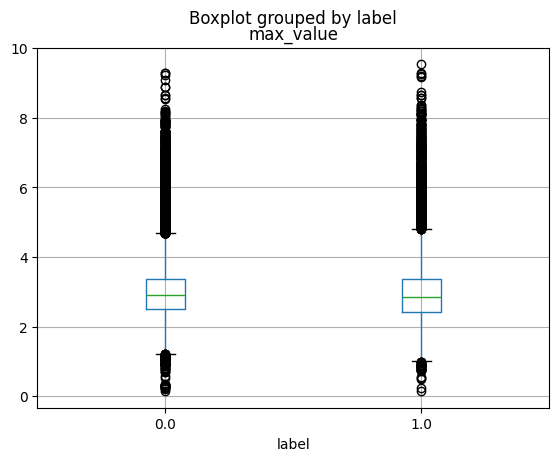

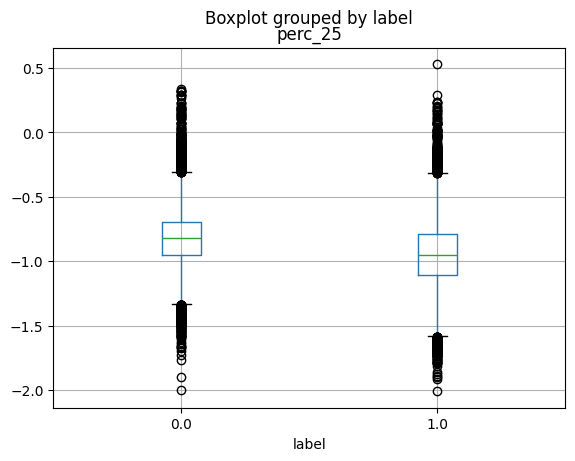

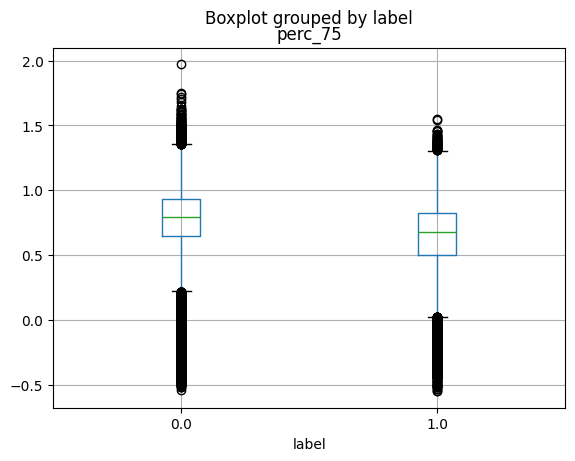

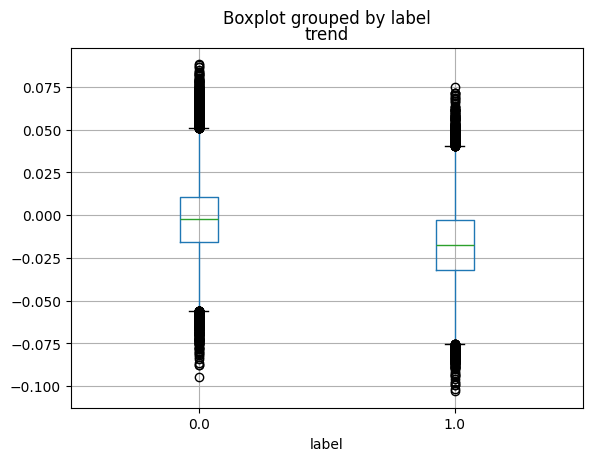

In [7]:
def mean_var(dataframe: pd.DataFrame, title: str = None):
    """
    Проанализируем среднее и их дисперсию.
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
    """

    dataframe['mean'] = dataframe['values'].apply(lambda row: np.mean(row))
    dataframe['var'] = dataframe['values'].apply(lambda row: np.var(row))
    dataframe['std'] = dataframe['values'].apply(lambda row: np.std(row))
    dataframe['min_value'] = dataframe['values'].apply(lambda row: np.min(row))
    dataframe['max_value'] = dataframe['values'].apply(lambda row: np.max(row))
    dataframe['perc_25'] = dataframe['values'].apply(lambda row: np.percentile(row, 25))
    dataframe['perc_75'] = dataframe['values'].apply(lambda row: np.percentile(row, 75))
    dataframe['trend'] = dataframe['values'].apply(lambda row: np.polyfit(range(len(row)), row, 1)[0])

    if title is not None:
        features_list = ['mean',
            'std',
            'min_value',
            'max_value',
            'perc_25',
            'perc_75',
            'trend']
        for feature in features_list:
            dataframe.boxplot(column=feature, by='label')
    else:
        pass

    

mean_var(train_pd, '')

In [11]:
train_pd

,id,dates,values,label,len_time_series,mean,var,std,min_value,max_value,perc_25,perc_75,trend
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,62,0.023710,1.788298,1.337272,-4.840000,3.49,-0.682500,0.7700,-0.011222
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,45,-0.310777,2.422185,1.556337,-3.534409,2.92,-1.040000,0.7100,-0.026755
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,48,-0.046042,1.134274,1.065023,-1.950000,2.61,-0.877500,0.6150,-0.032482
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,48,-0.130000,1.341429,1.158201,-2.220000,2.49,-0.950000,0.8250,0.049298
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,56,-0.270536,1.614244,1.270529,-2.500000,2.87,-1.250000,0.6775,-0.011478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79907,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,55,0.163818,1.700325,1.303965,-3.640000,2.56,-0.360000,1.0150,-0.005509
79908,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,53,-0.112555,1.479659,1.216413,-2.590000,2.16,-1.120319,1.1200,-0.012999
79909,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,51,-0.201373,1.398428,1.182551,-2.890000,2.27,-0.905000,0.4950,0.039878
79910,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,63,-0.075397,2.223838,1.491254,-2.850000,3.11,-1.465000,0.9850,0.006774


# Посмотрим на автокорреляцию на нескольких лагах

lag 1 complete
lag 2 complete
lag 3 complete
lag 4 complete
lag 5 complete


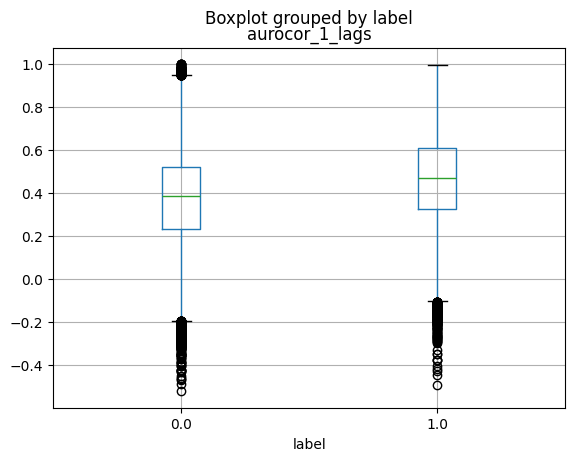

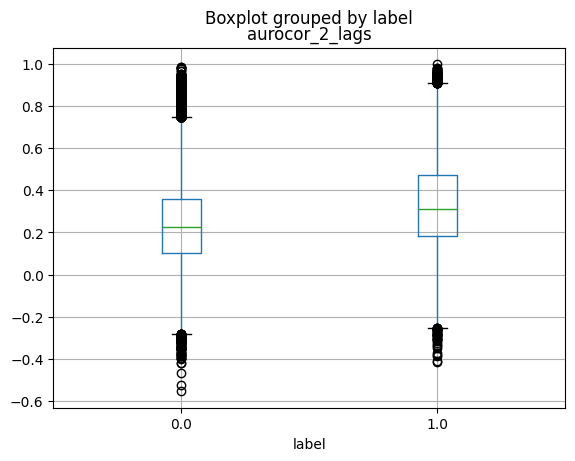

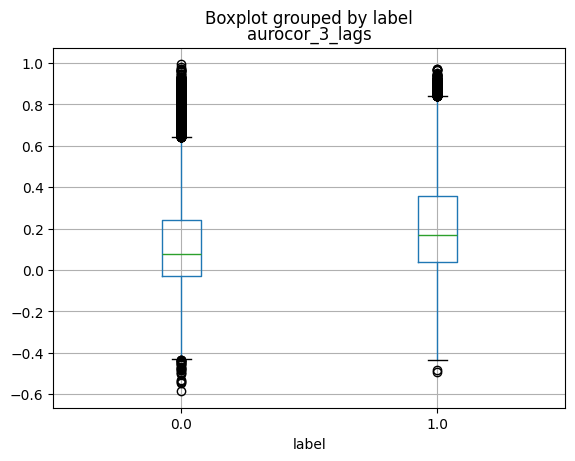

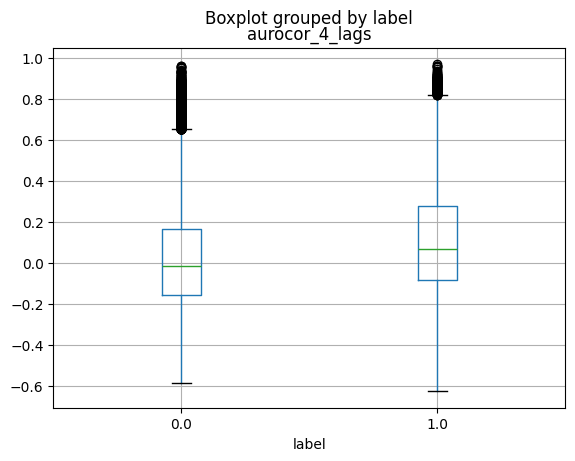

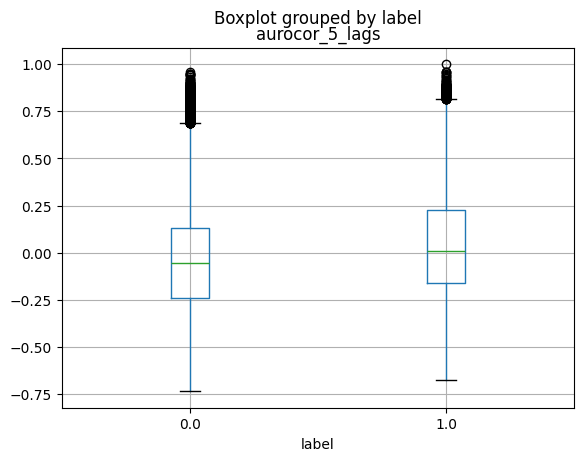

In [8]:
def autocor_for_k_lags(dataframe: pd.DataFrame, k: int):
    """
    Вычислени автокорреляции для k лагов
    """
    autocor = 'aurocor_{}_lags'
    for lag in range(1, k + 1):
        #  Предупржедения всплывают  из-за того, что есть некоторые ряды ,являющиеся постоянной величиной. Для таких рядов вычисление ковариации от двух постоянных величин будет просто равно нулю
        with np.errstate(divide="ignore", invalid="ignore"): 
            dataframe[autocor.format(str(lag))] = dataframe['values'].apply(lambda row: pd.Series(row).autocorr(lag=lag))
        print(f'lag {lag} complete')

    for lag in range(1, k + 1):
        dataframe[f'aurocor_{lag}_lags'] = dataframe[f'aurocor_{lag}_lags'].fillna(0.)

    for lag in range(1, k + 1):
        dataframe.boxplot(column=autocor.format(str(lag)), by='label')

autocor_for_k_lags(train_pd, 5)

In [9]:
train_pd.isna().any()

id                 False
dates              False
values             False
label              False
len_time_series    False
mean               False
var                False
std                False
min_value          False
max_value          False
perc_25            False
perc_75            False
trend              False
aurocor_1_lags     False
aurocor_2_lags     False
aurocor_3_lags     False
aurocor_4_lags     False
aurocor_5_lags     False
dtype: bool

# Лаги до 5го включительно будем использовать, остальное можно отбросить из-за одинаковых результатов

In [10]:
train_pd.head()

,id,dates,values,label,len_time_series,mean,var,std,min_value,max_value,perc_25,perc_75,trend,aurocor_1_lags,aurocor_2_lags,aurocor_3_lags,aurocor_4_lags,aurocor_5_lags
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,62,0.023710,1.788298,1.337272,-4.840000,3.49,-0.6825,0.7700,-0.011222,-0.113649,-0.098819,-0.058512,0.124424,-0.252553
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,45,-0.310777,2.422185,1.556337,-3.534409,2.92,-1.0400,0.7100,-0.026755,0.189858,0.024816,0.018005,0.026292,0.031851
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,48,-0.046042,1.134274,1.065023,-1.950000,2.61,-0.8775,0.6150,-0.032482,0.501409,0.359250,0.210503,0.138092,0.103757
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,48,-0.130000,1.341429,1.158201,-2.220000,2.49,-0.9500,0.8250,0.049298,0.705215,0.523239,0.598640,0.483954,0.408808
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,56,-0.270536,1.614244,1.270529,-2.500000,2.87,-1.2500,0.6775,-0.011478,0.088913,-0.151230,-0.096043,-0.087507,-0.168380


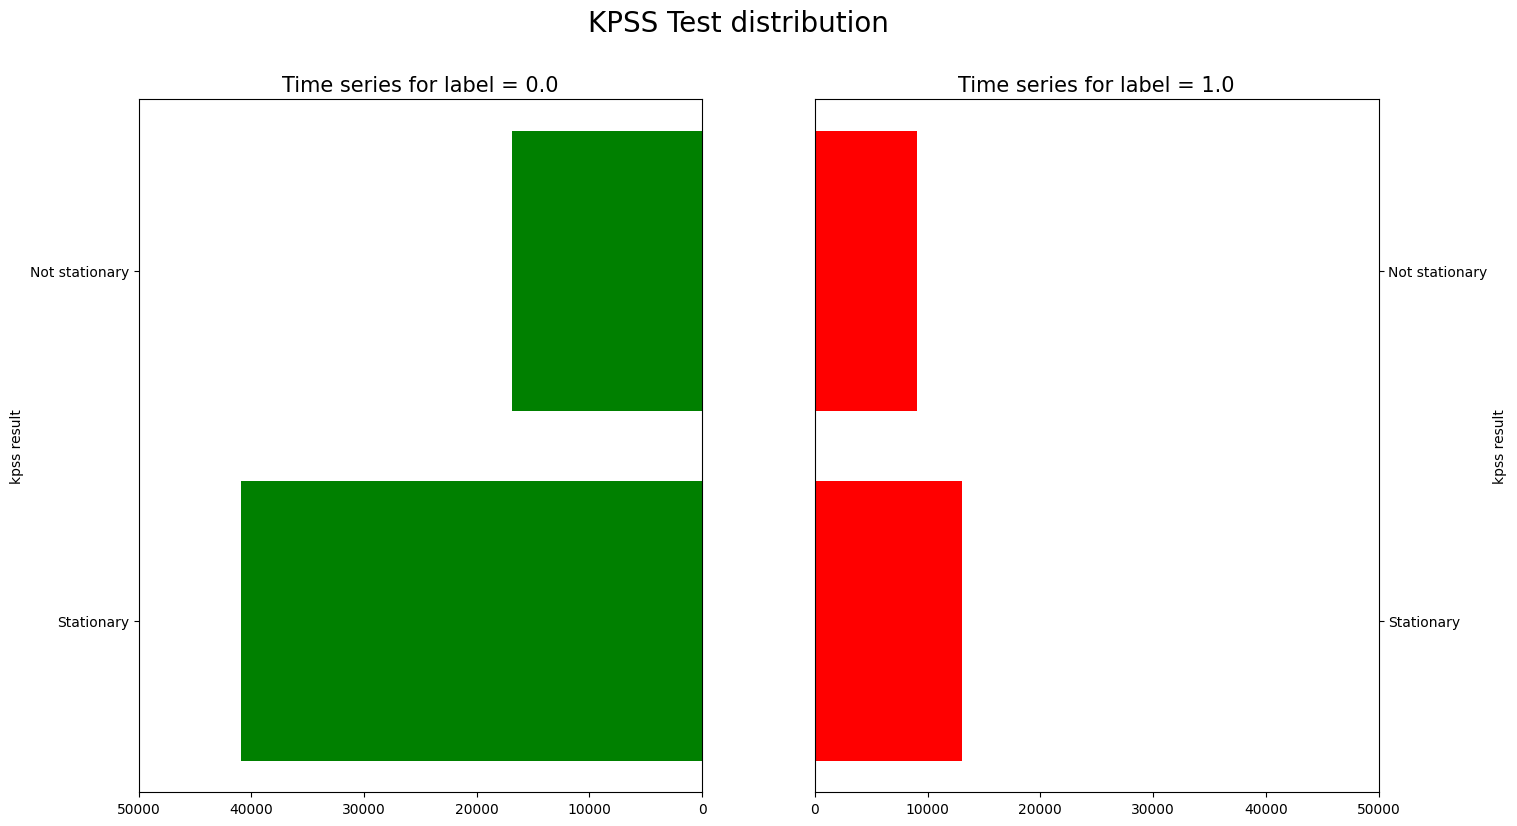

In [11]:
from statsmodels.tsa.stattools import kpss
def kpss_to_time_series(dataframe: pd.DataFrame, title: str):
    """
    проведем kpss тест на стационарность ряда
    и посмотрим распределения в каждом классе.
    В процессе могут появляться предупреждения,
    но нам интересна нижняя оценка p-value в таких случаях,
    поэтому от предупреждений избавимся
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
    """
    import warnings
    from statsmodels.tools.sm_exceptions import InterpolationWarning
    warnings.simplefilter('ignore', InterpolationWarning)
    dataframe['kpss'] = dataframe['values'].apply(lambda row: 'Stationary' if kpss(row)[1] > 0.05 else 'Not stationary')

    fig = plt.figure(figsize=(16, 9))
    axs = fig.subplots(1, 2)
    colors = ['green', 'red']
    labels = dataframe['label'].value_counts().keys()
    for ax, label in zip(axs, labels):
        ax.barh(y=dataframe['kpss'][dataframe['label'] == label].value_counts().keys(), width=dataframe['kpss'][dataframe['label'] == label].value_counts().values, color = colors[int(label)])
        if label == 1:
            ax.yaxis.set_label_position("right")
        ax.set_ylabel('kpss result')
        ax.set_title(f'Time series for label = {label}', fontsize = 15)
        ax.set_xlim(0, 50000)
    axs[0].invert_xaxis()
    axs[1].yaxis.tick_right()
    fig.suptitle(title, fontsize = 20)
    plt.show()
    dataframe['kpss'] = dataframe['kpss'].apply(lambda row: 1 if row == 'Stationary' else 0)

kpss_to_time_series(train_pd, 'KPSS Test distribution')

# Добавим лаговые признаки  и среднюю скорость изменения(первая разность)

lag_1 computed
lag_2 computed
lag_3 computed
lag_4 computed
lag_5 computed
All lags computed


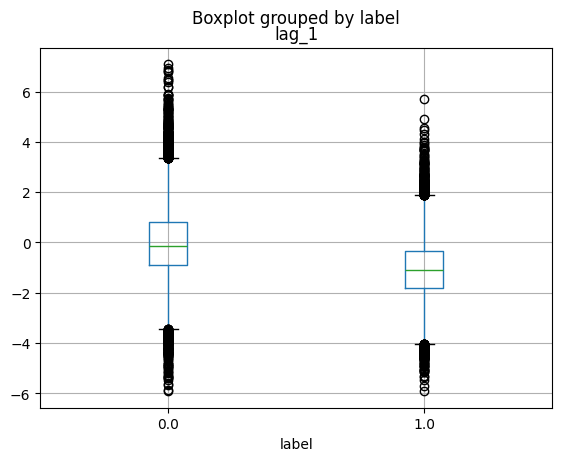

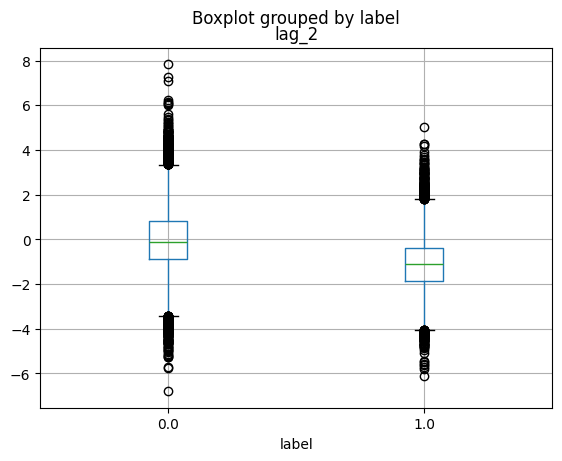

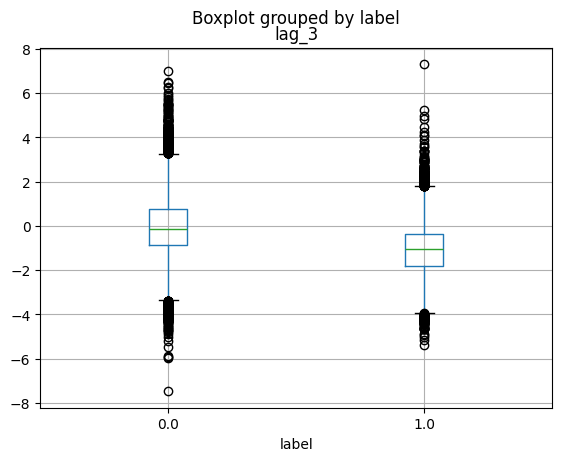

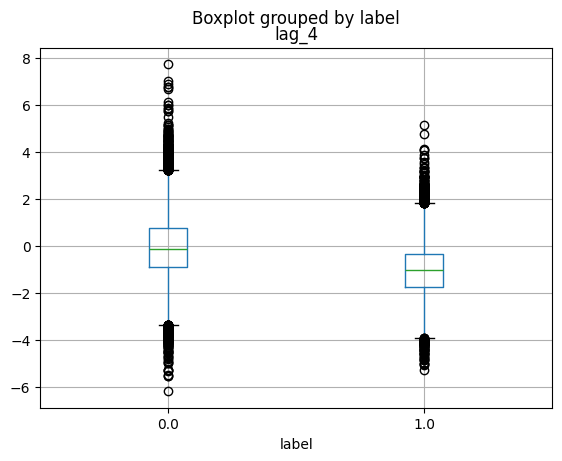

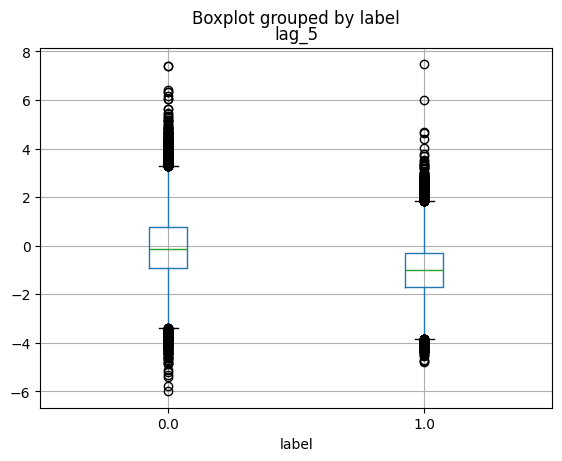

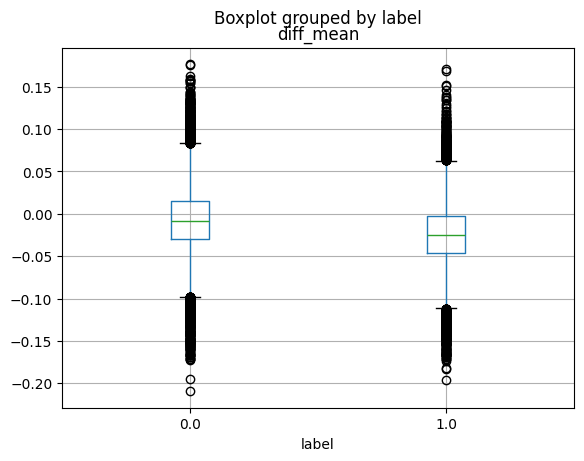

In [12]:
def lags_prop_and_diff(dataframe: pd.DataFrame, k: int):
    """
    Вычисляет лаговые признаки  и среднюю скорость изменения(первая разность)
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        k (int): кол-во лагов
    """
    for lag in range(1, k + 1):
        dataframe[f'lag_{lag}'] = dataframe['values'].apply(lambda row: pd.Series(row).shift(lag).iloc[-1])
        print(f'lag_{lag} computed')
    else:
        print('All lags computed')
    dataframe['diff_mean'] = dataframe['values'].apply(lambda row: np.mean(np.diff(row)))

    for lag in range(1, k + 1):
        dataframe.boxplot(column=f'lag_{lag}', by='label')
    dataframe.boxplot(column='diff_mean', by='label')



lags_prop_and_diff(train_pd, 5)    

In [13]:
train_pd

,id,dates,values,label,len_time_series,mean,var,std,min_value,max_value,...,aurocor_3_lags,aurocor_4_lags,aurocor_5_lags,kpss,lag_1,lag_2,lag_3,lag_4,lag_5,diff_mean
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0,62,0.023710,1.788298,1.337272,-4.840000,3.49,...,-0.058512,0.124424,-0.252553,1,-0.510000,0.350000,0.890000,-0.280000,1.200000,0.021148
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0,45,-0.310777,2.422185,1.556337,-3.534409,2.92,...,0.018005,0.026292,0.031851,1,-0.444409,0.045591,-2.824409,0.905591,-0.034409,0.022400
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0,48,-0.046042,1.134274,1.065023,-1.950000,2.61,...,0.210503,0.138092,0.103757,0,-0.020000,0.350000,0.420000,0.610000,-0.670000,-0.014894
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0,48,-0.130000,1.341429,1.158201,-2.220000,2.49,...,0.598640,0.483954,0.408808,0,1.240000,0.670000,0.950000,0.840000,0.820000,0.040851
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0,56,-0.270536,1.614244,1.270529,-2.500000,2.87,...,-0.096043,-0.087507,-0.168380,1,-2.500000,-1.690000,1.560000,0.760000,-0.010000,-0.037455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79907,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0,55,0.163818,1.700325,1.303965,-3.640000,2.56,...,-0.160777,-0.084410,-0.328217,1,-1.260000,1.750000,-2.830000,-3.500000,-1.940000,0.043148
79908,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0,53,-0.112555,1.479659,1.216413,-2.590000,2.16,...,0.015885,-0.253360,-0.482087,1,0.869681,-1.660319,-1.590319,-1.180319,-0.910319,0.003455
79909,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0,51,-0.201373,1.398428,1.182551,-2.890000,2.27,...,0.302201,0.259469,0.357680,0,0.470000,-0.880000,1.550000,1.190000,-0.320000,-0.042200
79910,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0,63,-0.075397,2.223838,1.491254,-2.850000,3.11,...,0.015391,-0.025691,-0.065415,1,0.600000,1.000000,2.120000,1.270000,0.240000,0.047742


# Проведем частотный анализ, будем брать первые 7  пиков

In [18]:
from scipy import signal
def fft_power_spectrum(dataframe: pd.DataFrame, k: int):
    """
    Проведем спектральный анализ для каждого временного ряда
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        k (int): кол-во значимых частот
    """
    freq_data = []
    power_data = []
    for i, iter in zip(dataframe['values'], range(len(dataframe['values']))):
        i_frequencies, i_power = signal.periodogram(i)
        k_peak_index = signal.find_peaks(i_power)[0]
        power_data += [i_power[k_peak_index[:k]]]
        freq_data += [i_frequencies[k_peak_index[:k]]]

        if iter % 5000 == 0:
            print(f'{iter} has computed')
    else:
        print('All has computed')
    dataframe['freq'] = freq_data[:]
    dataframe['power'] = power_data [:]


fft_power_spectrum(train_pd, 7)

0 has computed
5000 has computed
10000 has computed
15000 has computed
20000 has computed
25000 has computed
30000 has computed
35000 has computed
40000 has computed
45000 has computed
50000 has computed
55000 has computed
60000 has computed
65000 has computed
70000 has computed
75000 has computed
All has computed


C:\Users\ulmas\AppData\Local\Temp\ipykernel_37576\1478724125.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prom_df['freq'] = prom_df['freq'].apply(lambda row: np.round(row, 2))


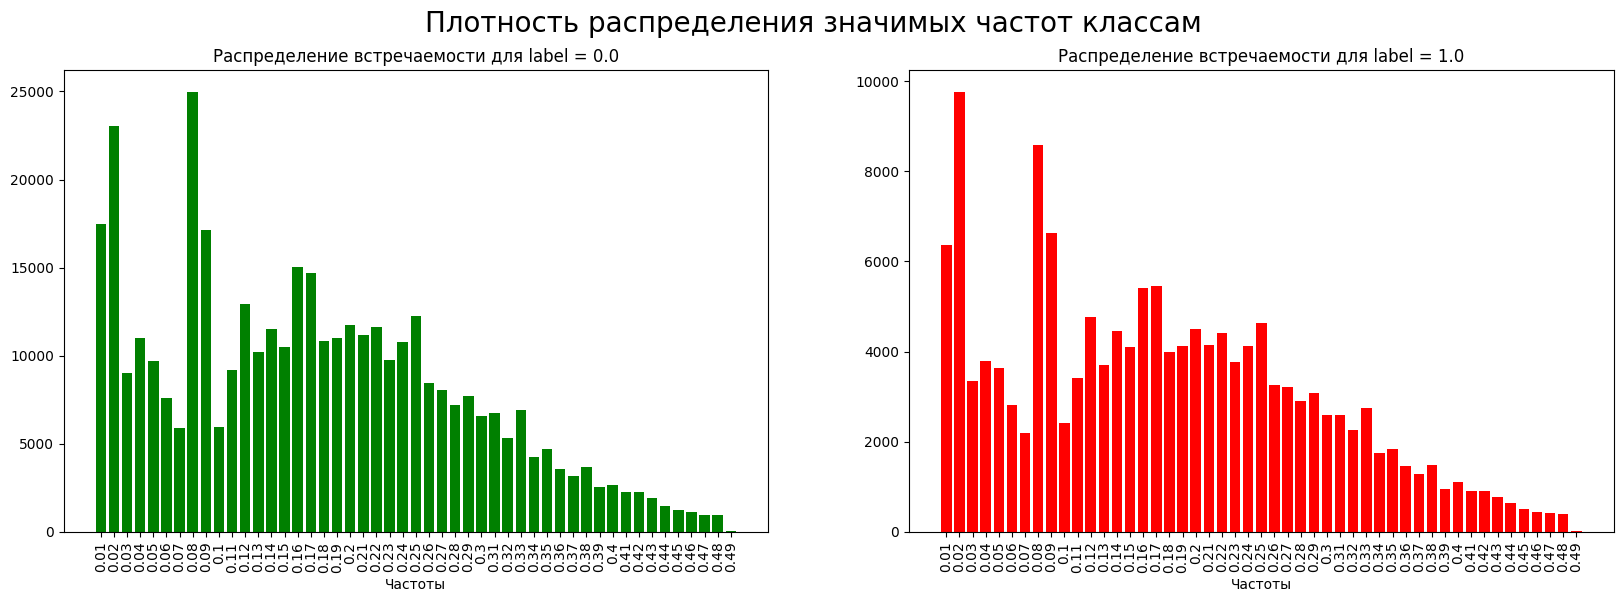

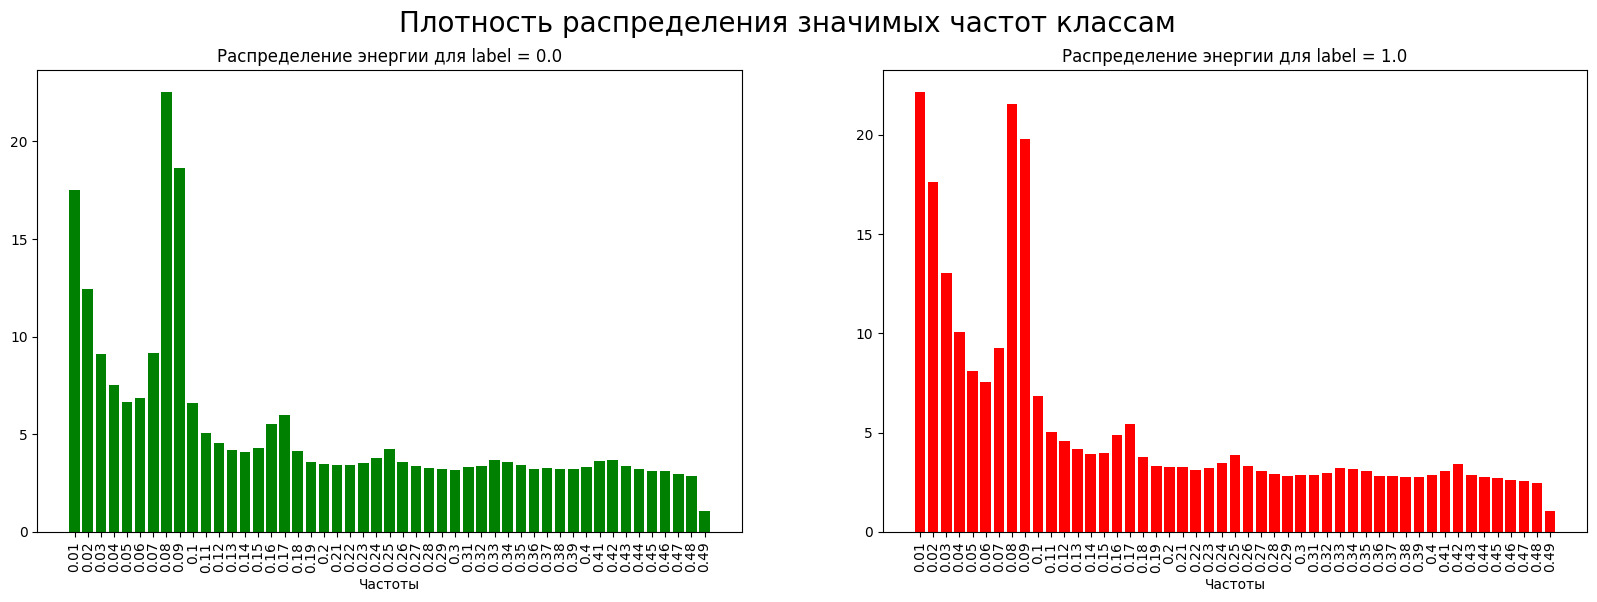

In [19]:
from collections import Counter

def plot_most_common_freq_and_energy(dataframe: pd.DataFrame, title: str):
    """
    Проанализируем основные частоты спектра для каждого класса.
    Округлим Частоты их до 2х знаков после запятой при отображении.
    Отобразим среднею энергию на каждой частоте
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
    """
    prom_df = dataframe[['label', 'freq', 'power']]
    prom_df['freq'] = prom_df['freq'].apply(lambda row: np.round(row, 2))

    freq_data_1 = np.array([])
    freq_data_0 = np.array([])

    for row in prom_df['freq'][prom_df['label'] == 1]:
        freq_data_1 = np.concatenate([freq_data_1, row])

    for row in prom_df['freq'][prom_df['label'] == 0]:
        freq_data_0 = np.concatenate([freq_data_0, row])

    freq_data_1 = Counter(np.sort(freq_data_1))
    freq_data_0 = Counter(np.sort(freq_data_0))

    power_data_1 = Counter()
    power_data_0 = Counter()


    for row, freqncy in zip(prom_df['power'][prom_df['label'] == 1], prom_df['freq'][prom_df['label'] == 1]):
        for i in range(len(row)):
            if type(power_data_1[freqncy[i]]) == int:
                power_data_1[freqncy[i]] = np.concatenate([[np.array(power_data_1[freqncy[i]])], [row[i]]])
            else:
                power_data_1[freqncy[i]] = np.concatenate([np.array(power_data_1[freqncy[i]]), [row[i]]])


    for row, freqncy in zip(prom_df['power'][prom_df['label'] == 0], prom_df['freq'][prom_df['label'] == 0]):
        for i in range(len(row)):
            if type(power_data_0[freqncy[i]]) == int:
                power_data_0[freqncy[i]] = np.concatenate([[np.array(power_data_0[freqncy[i]])], [row[i]]])
            else:
                power_data_0[freqncy[i]] = np.concatenate([np.array(power_data_0[freqncy[i]]), [row[i]]])


    power_data = [dict(sorted(power_data_0.items(),key = lambda i: i[0])), dict(sorted(power_data_1.items(),key = lambda i: i[0]))]

    for i in power_data:
        for freqncy in i.keys():
            i[freqncy] = i[freqncy].mean()


    colors = ['green', 'red']
    freq_data = [freq_data_0, freq_data_1]
    fig = plt.figure(figsize=(20, 6))
    axs = fig.subplots(1, 2)
    labels = prom_df['label'].value_counts().keys()
    for ax, label, freqs, color in zip(axs, labels, freq_data, colors):
        ax.bar(np.array(list(freqs.keys()), dtype = str), freqs.values(), color = color)
        ax.set_title(f'Распределение встречаемости для label = {label}')
        ax.set_xlabel('Частоты')
        ax.tick_params(axis='x', labelrotation=90)
    fig.suptitle(title, fontsize = 20)
    plt.show()

    fig = plt.figure(figsize=(20, 6))
    axs = fig.subplots(1, 2)
    labels = prom_df['label'].value_counts().keys()
    for ax, label, freqs, color in zip(axs, labels, power_data, colors):
        ax.bar(np.array(list(freqs.keys()), dtype = str), freqs.values(), color = color)
        ax.set_title(f'Распределение энергии для label = {label}')
        ax.set_xlabel('Частоты')
        ax.tick_params(axis='x', labelrotation=90)
    fig.suptitle(title, fontsize = 20)
    plt.show()


plot_most_common_freq_and_energy(train_pd, 'Плотность распределения значимых частот классам')


# Частотный анализ для этих 2х классов не показал различий 

In [15]:
train_pd.columns

Index(['id', 'dates', 'values', 'label', 'len_time_series', 'mean', 'var',
       'std', 'min_value', 'max_value', 'perc_25', 'perc_75', 'trend',
       'aurocor_1_lags', 'aurocor_2_lags', 'aurocor_3_lags', 'aurocor_4_lags',
       'aurocor_5_lags', 'kpss', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'diff_mean'],
      dtype='object')

# Посмотрим на основные зависимости между данныи. На самом деле pairplot перерисовывать не обязательно, т.к. занимает минут 30

In [80]:
# sns.pairplot(train_pd[['len_time_series', 'mean', 'var',
#                         'min_value', 'max_value', 'perc_25', 'perc_75', 'trend',
#                         'aurocor_1_lags', 'aurocor_2_lags', 'kpss', 
#                         'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
#                         'diff_mean', 'label']], hue='label')

# Можно заметить, что связь среднего значения с остальными величинами для обоих классов выглядит как два множества с одной общей границей. Давайте проанализируем детальнее 

In [116]:
train_pd.columns

Index(['id', 'dates', 'values', 'label', 'len_time_series', 'mean', 'var',
       'std', 'min_value', 'max_value', 'perc_25', 'perc_75', 'trend',
       'aurocor_1_lags', 'aurocor_2_lags', 'aurocor_3_lags', 'aurocor_4_lags',
       'aurocor_5_lags', 'kpss', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'diff_mean', 'freq', 'power'],
      dtype='object')

# Попробуем AutoReg модель с max порядком 10 и так же посмотрим на зависимости. Значимые коэффициенты будем записыать, остальные будем занулять

In [16]:
from statsmodels.tsa.ar_model import AutoReg
def ar_test(dataframe: pd.DataFrame, k: int):
    """
    Построим модель авторегресии
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        k (int): кол-во Коэффициентов
    """
    params_data = np.array([])
    for i in dataframe['values']:
        ar_model = AutoReg(i, lags=k, trend='ct')
        ar_model_fit = ar_model.fit()
        a = ar_model_fit.pvalues
        ar_model_fit.params[a >= 0.05] = 0
        params_data = np.concatenate([params_data, ar_model_fit.params])
    print('Computation done')
    coef_dict = [
        'ar_const',	
        'ar_trend',
        'L1',	
        'L2',	
        'L3',	
        'L4',	
        'L5',	
        'L6',	
        'L7',
        'L8',
        'L9',
        'L10'
    ]

    params_data = params_data.reshape(len(dataframe['values']), len(coef_dict))
    for coef in range(len(coef_dict)):
        dataframe[coef_dict[coef]] = params_data[:, coef]

ar_test(train_pd, 10)


Computation done


# Тут pairplot тоже перерисовывать не обязательно, т.к. занимает минут 30

In [79]:
# sns.pairplot(train_pd[['ar_const',	
#         'ar_trend',
#         'L1',	
#         'L2',	
#         'L3',	
#         'L4',	
#         'L5',	
#         'L6',	
#         'L7',
#         'L8',
#         'L9',
#         'L10', 
#         'label',
#         'lag_1',
#         'lag_2',
#         'lag_3',
#         'lag_4',
#         'lag_5',
#         'mean']], hue='label')

# Построим распределение по коэффициентам, для более наглядного анализа

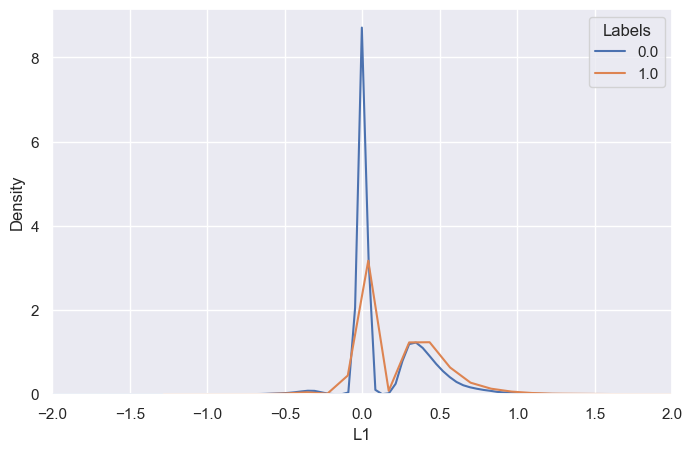

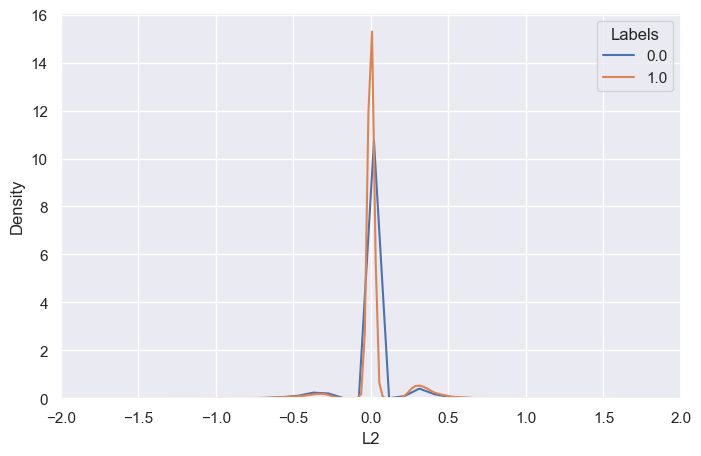

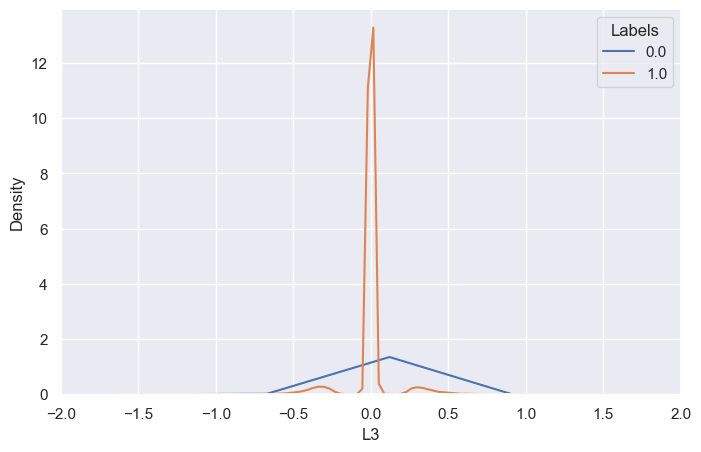

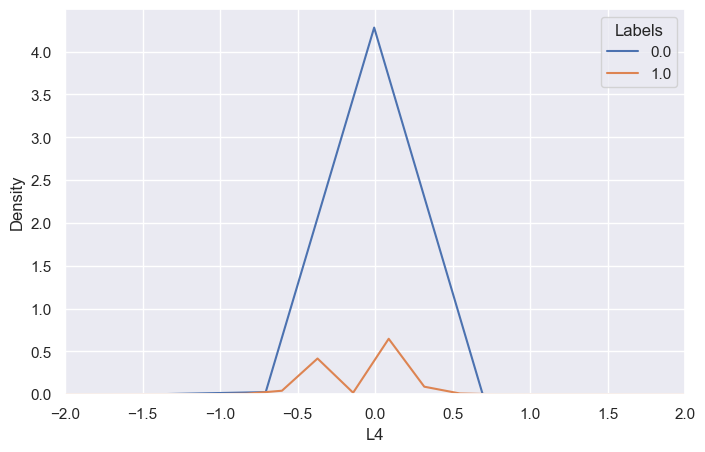

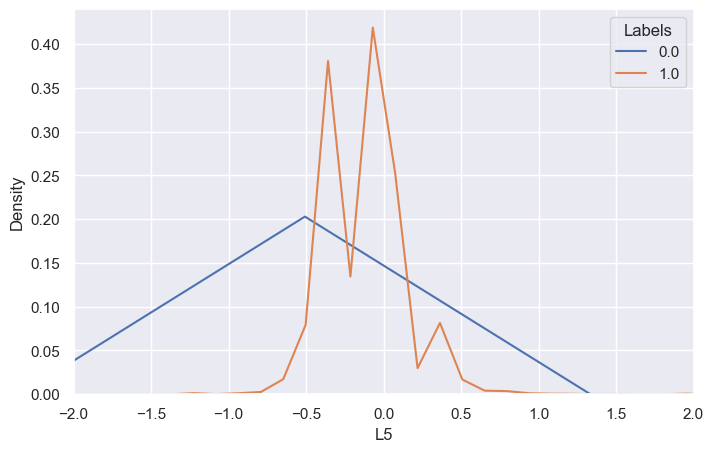

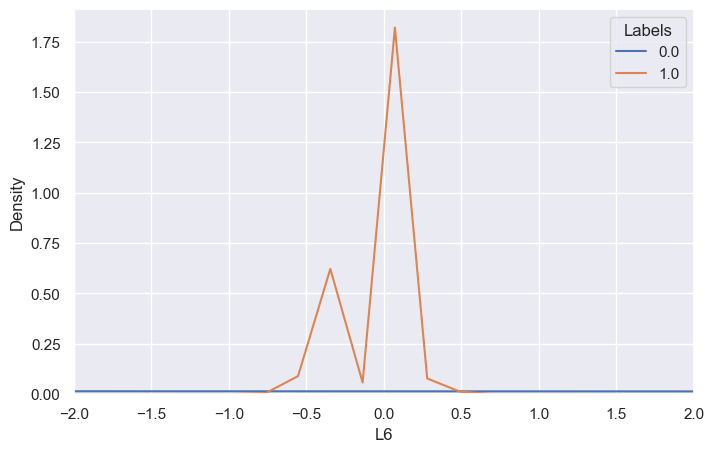

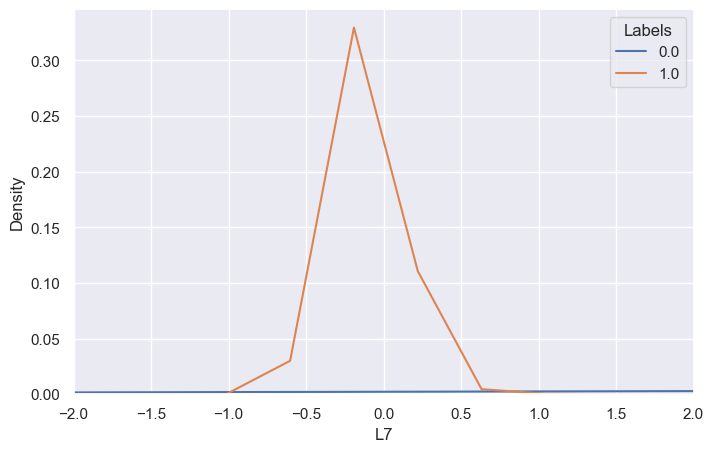

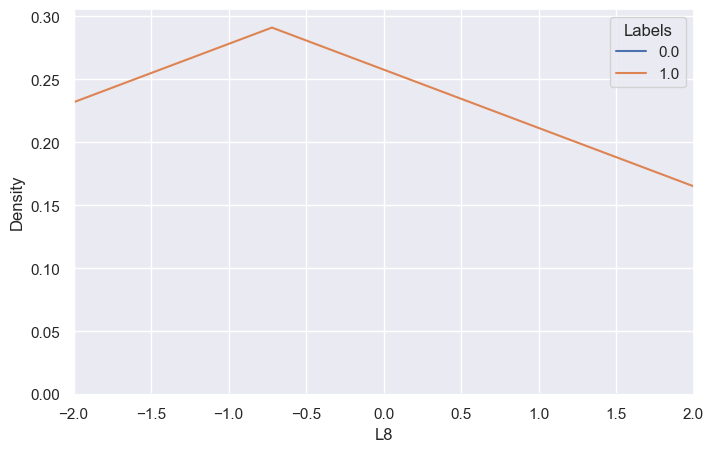

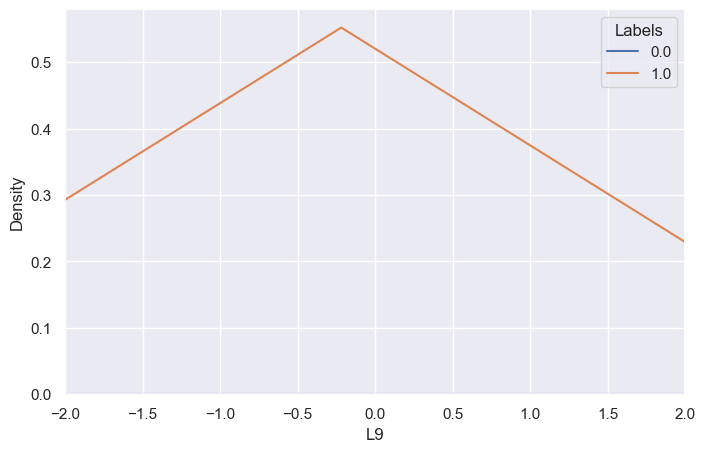

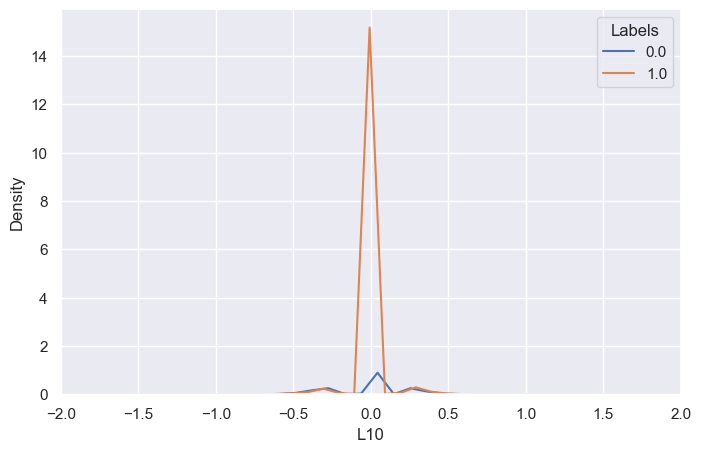

In [38]:
nums  = list(range(1, 11))
for num in nums:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    plots =[]

    for i in dict(train_pd['label'].value_counts()).keys():
        sns.set_theme()
        plots += [sns.kdeplot(data=train_pd[f'L{num}'][train_pd['label'] == i])]
        
    ax.set_xlabel(f'L{num}')
    plt.xlim(-2, 2)
    plt.legend(labels = dict(train_pd['label'].value_counts()).keys(), title = 'Labels')
    plt.show()

# Признаки L1 и L2 Очень похожи, причем признак L2 имеет, в основном, пик в нуле, что означает небольшую значимость данного слагаемого. Признаки с L6 по L10 в основном соответствуют классу 1 т.к. имеют пик в нуле, т.е не значимые слагаемые

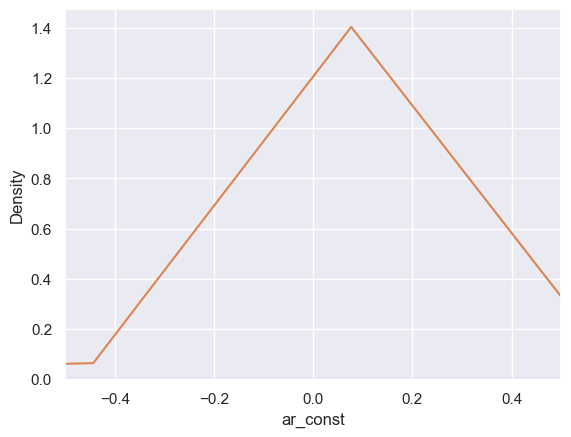

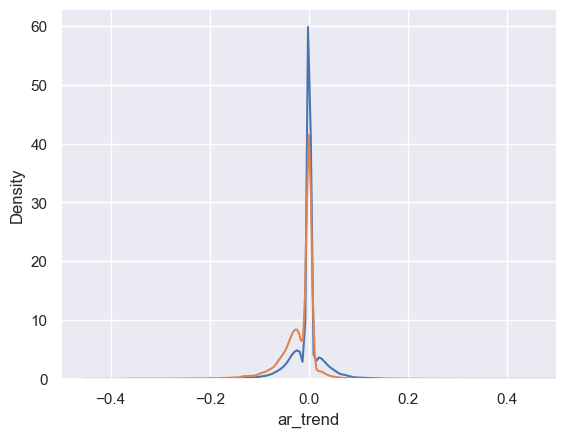

In [39]:
dct = ['ar_const', 'ar_trend']
for d in dct:
    for i in dict(train_pd['label'].value_counts()).keys():
        plots += [sns.kdeplot(data=train_pd[d][train_pd['label'] == i])]
        sns.set_theme()
    plt.xlim(-0.5, 0.5)
    plt.show()

# Так же значимой будет ar_const. 

# Возьмем mean, perc_25, ar_const, L3 -L10 и попробуем результаты kpss теста

In [17]:
final_training_dataframe = train_pd[['mean', 'perc_25', 'ar_const', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'kpss', 'label']]
final_training_dataframe

,mean,perc_25,ar_const,L3,L4,L5,L6,L7,L8,L9,L10,kpss,label
0,0.023710,-0.682500,2.149103,-0.250782,0.000000,-0.584993,-0.257107,0.0,-0.352238,0.0,-0.394035,1,0.0
1,-0.310777,-1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1,1.0
2,-0.046042,-0.877500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,0.0
3,-0.130000,-0.950000,-1.894919,0.400033,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,0.0
4,-0.270536,-1.250000,0.000000,0.000000,-0.381443,-0.443274,-0.344296,0.0,-0.337361,0.0,-0.437332,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79907,0.163818,-0.360000,0.000000,0.000000,0.000000,-0.365884,0.000000,0.0,-0.420287,0.0,0.000000,1,0.0
79908,-0.112555,-1.120319,0.000000,0.000000,0.000000,-0.317423,0.000000,0.0,-0.306635,0.0,0.000000,1,1.0
79909,-0.201373,-0.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,0.0
79910,-0.075397,-1.465000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1,0.0


In [29]:
final_training_dataframe['label'] = final_training_dataframe['label'].apply(lambda row: int(row))
final_training_dataframe.head()

C:\Users\ulmas\AppData\Local\Temp\ipykernel_27120\3832644108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_training_dataframe['label'] = final_training_dataframe['label'].apply(lambda row: int(row))


,mean,perc_25,ar_const,L3,L4,L5,L6,L7,L8,L9,L10,kpss,label
0,0.023710,-0.6825,2.149103,-0.250782,0.000000,-0.584993,-0.257107,0.0,-0.352238,0.0,-0.394035,1,0
1,-0.310777,-1.0400,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1,1
2,-0.046042,-0.8775,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,0
3,-0.130000,-0.9500,-1.894919,0.400033,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,0
4,-0.270536,-1.2500,0.000000,0.000000,-0.381443,-0.443274,-0.344296,0.0,-0.337361,0.0,-0.437332,1,0


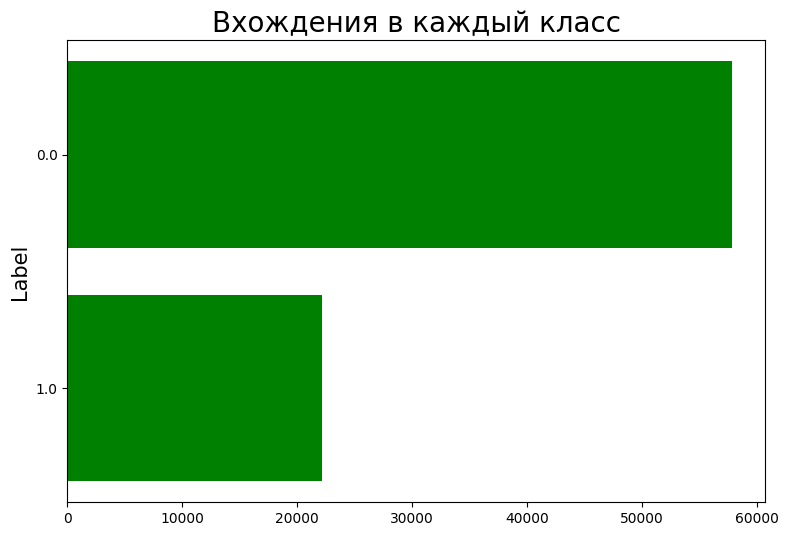

In [18]:
def plot_labels_gist(dataframe: pd.DataFrame, title: str):
    """
    Визуализация количества объектов каждого класса
    Параметры:
        dataframe (pd.DataFrame): датафрейм для анализа
        title (str): название графика
    """
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1)
    ax.invert_yaxis()
    ax.barh(y=list(map(str, dataframe['label'].value_counts().keys())), width=dataframe['label'].value_counts().values, color='green')
    plt.title(title, fontsize=20)
    plt.ylabel('Label', fontsize = 15)
    plt.show()

plot_labels_gist(train_pd, 'Вхождения в каждый класс')

# После подсчета количества объектов каждого класса в обучающей выборке, можем заметить, что данные не сбалансированны. При обучении модели будем использовать балансировку классов

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

X = final_training_dataframe.drop('label', axis=1)
y = final_training_dataframe['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [20]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [21]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [22]:
best_rf = grid_search.best_estimator_
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [23]:
y_pred_prob = best_rf.predict_proba(X_val)[:, 1]

# Рассчитываем метрику ROC AUC
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f'ROC AUC на валидационной выборке: {roc_auc:.4f}')

ROC AUC на валидационной выборке: 0.8359


In [24]:
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Вывести важные признаки
print(feature_importances)

     Feature  Importance
0       mean    0.639704
1    perc_25    0.147883
2   ar_const    0.081872
11      kpss    0.036598
6         L6    0.014398
5         L5    0.014081
4         L4    0.013669
7         L7    0.012252
3         L3    0.011443
8         L8    0.010518
9         L9    0.010075
10       L10    0.007509


# В результате значимыми признаками являются первые 3. Коэффициенты ряда наоборот - их вполне можно исключить

# Сохранение весов 

In [36]:
import joblib
joblib.dump(best_rf, 'random_forest_mode_kpss.pkl')

['random_forest_mode_kpss.pkl']

# Случайный лес с нормализацией данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(final_training_dataframe), columns=final_training_dataframe.columns)
df_min_max_scaled.head()

,mean,perc_25,ar_const,L3,L4,L5,L6,L7,L8,L9,L10,kpss,label
0,0.642090,0.522651,0.002143,0.122160,0.767590,0.119439,0.991966,0.963617,0.555774,0.000495,0.876062,1.0,0.0
1,0.437169,0.381906,0.002139,0.123760,0.767590,0.121041,0.991980,0.963617,0.555931,0.000495,0.894801,1.0,1.0
2,0.599357,0.445881,0.002139,0.123760,0.767590,0.121041,0.991980,0.963617,0.555931,0.000495,0.894801,0.0,0.0
3,0.547921,0.417338,0.002136,0.126311,0.767590,0.121041,0.991980,0.963617,0.555931,0.000495,0.894801,0.0,0.0
4,0.461822,0.299231,0.002139,0.123760,0.765065,0.119827,0.991962,0.963617,0.555780,0.000495,0.874002,1.0,0.0


In [61]:
X_norm = df_min_max_scaled.drop('label', axis=1)
y_norm = df_min_max_scaled['label']

X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_norm, y_norm, test_size=0.3, stratify=y_norm, random_state=42)


In [ ]:

grid_search_norm = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_norm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [35]:
best_rf = grid_search.best_estimator_
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [36]:
y_pred_prob = best_rf.predict_proba(X_val)[:, 1]

# Рассчитываем метрику ROC AUC
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f'ROC AUC на валидационной выборке: {roc_auc:.4f}')

ROC AUC на валидационной выборке: 0.4410


# Попробуем градиентный бустинг

In [37]:
from xgboost import XGBClassifier

In [74]:
params = {
    'max_depth':[3, 5, 7, 9],
    'learning_rate': [0.1, 0.06, 0.01, 0.005],
    'n_estimators': [50, 100, 200, 400],
}

model = XGBClassifier(class_weight='balanced')
grid_search_xgb = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)

In [77]:
model.fit(X_train, y_train)

C:\Users\ulmas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:43:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [78]:
y_pred_xgb = model.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred_xgb)
print(f'ROC AUC на валидационной выборке: {roc_auc:.4f}')

ROC AUC на валидационной выборке: 0.7017


In [63]:
# model.fit(X_train, y_train)
grid_search_xgb.fit(X_train_norm, y_train_norm)

C:\Users\ulmas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [19:32:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.06, 0.01, 0.005],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='roc_auc')

In [64]:
best_xgb = grid_search_xgb.best_estimator_
print(f'Лучшие гиперпараметры: {grid_search_xgb.best_params_}')

Лучшие гиперпараметры: {'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 400}


In [66]:
y_pred_xgb = best_xgb.predict(X_val_norm)

roc_auc = roc_auc_score(y_val_norm, y_pred_xgb)
print(f'ROC AUC на валидационной выборке: {roc_auc:.4f}')

ROC AUC на валидационной выборке: 0.7033


# Дальше тривиальный анализ для  nan-рядов в выборке 

In [416]:
train = pd.read_parquet('train.parquet' , engine='auto')
train['label'].value_counts()

label
1.0    53
0.0    35
Name: count, dtype: int64

In [417]:
train_pd['label'].value_counts()

label
0.0    57768
1.0    22123
Name: count, dtype: int64

# Вероятность встретить nan ряд в кслассе -> label = 1 больше в 2.5 раза (P = 0.0023), а в классе label = 0 (P = 0.0006). Поэтому будем для таких рядов просто выбирать вероятность 0.71.